# Honours Algebra Project: 
# Google's Pagerank Algorithm and Power iteration


#### Authors: Shurui Zhang (s2193407), James Han (s2610917), Harry Han (s2162783), Kton Xia (s2149959).

## 1. Introduction to Google's Pagerank Algorithm

Google's PageRank algorithm, developed by Larry Page and Sergey Brin, is designed to guide users to the most relevant and authoritative content in the internet. We have billions of webpages in the internet. It is highly possible that a webpage has a link to another webpage. For example, if we search "apple" in Google, there is around 12 billion results. This is an example of how Google links to other webpages. Pagerank assigns a numerical value to each page based on the quantity and quality of links pointing to it, determining its importance within the web ecosystem. This algorithm forms the backbone of Google's search engine, ensuring users receive the most relevant and authoritative results to their queries. In this Skills Project, we will implement the Google's Pagerank algorithm in Sage.

By regarding each webpage as a vertex, we can perceive the internet as a directed graph, where the directed edges represent hyperlinks. Let's start by constructing directed graphs in Sage.

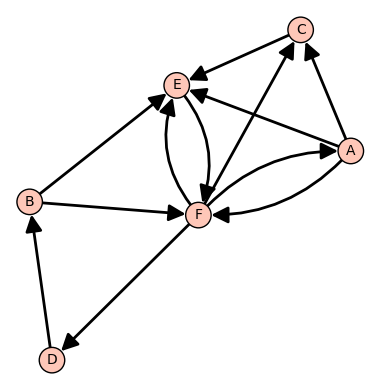

In [1]:
# Note that by executing the this cell multiple times, 
# the generated graphs may vary, but they are isomorphic.

G = DiGraph({1:[3, 5, 6], 2:[5, 6], 3:[5], 4:[2], 5:[6], 6:[1, 3, 4, 5]})
G.relabel({1:'A', 2:'B', 3:'C', 4:'D', 5:'E', 6:'F'})
show(G, figsize=[2, 2])

The corrosponding adjacency matrix $A$ is defined as:

$$
(A)_{ij}=\begin{cases}
      1, & \text{if the $i^{\text{th}}$ webpage links to the $j^{\text{th}}$ webpage}\\
      0, & \text{otherwise}
    \end{cases}     
$$

The adjacency matrix can be computed in Sage busing the following code:

In [2]:
ad = G.adjacency_matrix().T
pretty_print(ad)

[0 0 0 0 0 1]
[0 0 0 1 0 0]
[1 0 0 0 0 1]
[0 0 0 0 0 1]
[1 1 1 0 0 1]
[1 1 0 0 1 0]

The importance of the $i^{\text{th}}$ webpage can be computed by counting the number of webpages that links to $i$, in other words, by summing up the values in $i^{\text{th}}$ column of the adjacency matrix  

In [3]:
# importance of each node
[sum(ad.columns()[i]) for i in range(6)]

[3, 2, 1, 1, 1, 4]

<div class="alert alert-info">
    <h3>Exercise 1.1</h3><span class="label label-danger">(assessed)</span>
    
Write a function called `importances` that takes a directed graph `G` and returns the list of importances of each webpage.
</div>

In [4]:
def importances(G):
    """
    Computes the importance of each webpage in the directed graph G.

    Parameters:
    - G: Directed graph representing webpages and hyperlinks.

    Returns:
    - A list containing the importance score of each webpage.
    """
    # Get the number of vertices in the graph G
    n = len(G.vertices(sort=False))
    
    # Compute the adjacency matrix of the graph G
    ad = G.adjacency_matrix().T
    
    # Compute the importance score of each webpage
    importances = [sum(ad.columns()[i]) for i in range(n)]
    
    return importances

In [5]:
# Autograder 1pt

assert importances(G) == [3, 2, 1, 1, 1, 4]
print("Successful, you have calculated the right importances.")

Successful, you have calculated the right importances.


The previous method of determining importance is naive. It doesn't consider that not all recommendations are equal. For instance, if one page recommends only one other page while another recommends twenty, it's unreasonable to consider them equally important.

Let's introduce a more sophisticated approach. Assume each webpage has a quality score represented by a number $0 < x_j \le 1$, referred to as the PageRank of page $P_j$

PageRank is determined by the following rule: each page divides its PageRank among its outgoing links, distributing one piece to each linked page. In addition, a page's PageRank is defined as the sum of all the PageRank it receives from pages linking to it. This can be mathematically expressed as:

$$
x_i = \sum_{j \to i} \frac{x_j}{N_j},
$$

where $N_j$ represents the number of outbound links from page $P_j$, and $j \to i$ denotes that page $P_j$ links to page $P_i$. 

Denote $\mathbf{x} = (x_i)_{i = 1}^{n}$. The set of the Pagerank equations can be represented in the Matrix form:

$$
\mathbf{x} = A\mathbf{x},
$$

where $A$ is the matrix corresponding to the linear system of Pagerank equations. 

For example, the matrix $A$ of the graph $G$ is computed in the following cell.

In [6]:
A = matrix([ad.columns()[i]/max(sum(ad.columns()[i]), 1) for i in range(6)])
A = A.T
pretty_print(A)

[  0   0   0   0   0 1/4]
[  0   0   0   1   0   0]
[1/3   0   0   0   0 1/4]
[  0   0   0   0   0 1/4]
[1/3 1/2   1   0   0 1/4]
[1/3 1/2   0   0   1   0]

We can see that the sum of each colomn is all equals to 1. And this is exactly an example of Markov matrix, which we will discuss in the later sections. 

<div class="alert alert-info">
    <h3>Exercise 1.2</h3><span class="label label-danger">(assessed)</span>
    
Write a function `generate_Page_Rank_Matrix` that takes in the directed graph `G` and returns the corresponding matrix associated with its Pagerank equations.
</div>

In [7]:
def generate_Page_Rank_Matrix(G):
    """
    Generates the PageRank matrix for the directed graph G.

    Parameters:
    - G: Directed graph representing webpages and hyperlinks.

    Returns:
    - A matrix representing the PageRank transition matrix.
    """
    # Compute the adjacency matrix of the graph G
    ad = G.adjacency_matrix().T
    
    # Get the number of vertices in the graph G
    n = len(G.vertices(sort=False))
    
    # Normalize the rows of the adjacency matrix by dividing by the sum of each row
    A = matrix([ad.columns()[i] / max(sum(ad.columns()[i]), 1) for i in range(n)])
    
    # Transpose the matrix to get the correct PageRank representation
    A = A.T
    
    return A

In [8]:
# Autograder 1pt

# Generate a random directed graph with n vertices and N edges
n = 10
N = 50
D = digraphs.RandomDirectedGNM(n, N)

# Generate the PageRank matrix for the graph D
M = generate_Page_Rank_Matrix(D)

# Check if each column of the adjacency matrix sums up to 1 (PageRank property)
for i in range(n):
    assert sum(M.columns()[i]) == 1

# If the assertion passes for all columns, print success message
print("Successful, you have calculated the Page Rank Matrices correctly.")

Successful, you have calculated the Page Rank Matrices correctly.


Note that calculating the quality score vector is equivalent to computing the eigenvector corresponding to 1. Briefly speaking, Markov matrix must have an eigenvalue 1, and a unique eigenvector corrosponding to this. Thus the 
value of $i^{\text{th}}$ entry of the eigenvector determines the order of importance of the $i^{\text{th}}$ vertex.

But in the reality, we may need to deal with a network that contains billions of webpages, which implies that the corrosponding adjacency martix may be a billion by a billion square matrix. It is nearly impossible to find the required eigenvector by the usual way because it is too time consuming.

So a method to appoximate this is by power iteration. The basic point is that if $ \overrightarrow{w}\ge 0$ and $|\overrightarrow{w}|=1$, then 

$$
\lim\limits_{k\to \infty} M^k\overrightarrow{w}=\overrightarrow{v}, \text{where } M \text{ is a Markov matrix},
$$

which we will discuss in the later section.

## 2. Power iteration

**Definition** Let $A \in \mathbb{R}^{n \times n}$ be a diagonalizable matrix with eigenvalues $\lambda_1, \lambda_2, \cdots, \lambda_n$. $\lambda_1$ is called the **dominant eigenvalue** of $A$ if

$$
|\lambda_1| > |\lambda_i|,   \text{ for all } i \in \{2, 3, \cdots, n\}.
$$

**Note:** Not every diagonalizable matrix necessarily possesses a dominant eigenvalue. For example, consider the matrices below where all eigenvalues have equal magnitudes.

In [9]:
a = var('a')
A = Matrix(2, 2, [1, a, 0, -1])
print("The Matrix A")
pretty_print(A)
print("has eigenvalues \n")
print(A.eigenvalues())

The Matrix A


[ 1  a]
[ 0 -1]

has eigenvalues 

[-1, 1]


**Theorem:** If $\mathbf{v}$ is an eigenvector of a matrix $A$, then its corresponding eigenvalue is given by

$$
\lambda = \frac{\langle\, A\mathbf{v}, \mathbf{v}\rangle}{\langle\, \mathbf{v}, \mathbf{v} \rangle}.
$$

This quotient is called the **Rayleigh quotient**.

The proof of this theorem is straignt forward by noting

$$
\frac{\langle\, A\mathbf{v}, \mathbf{v}\rangle}{\langle\, \mathbf{v}, \mathbf{v} \rangle} = \frac{\langle\, \lambda\mathbf{v}, \mathbf{v}\rangle}{\langle\, \mathbf{v}, \mathbf{v} \rangle} = \frac{\lambda \langle\, \mathbf{v}, \mathbf{v} \rangle}{\langle\, \mathbf{v}, \mathbf{v} \rangle} = \lambda.
$$

<div class="alert alert-info">
    <h3>Exercise 2.1</h3><span class="label label-danger">(assessed)</span>
    
Using the defintion of Rayleigh quotient, write a function `Rayleigh_quotient` that takes in the matrix `A` and the vector `q` and returns the corresponding Rayleigh quotient.
</div>

In [10]:
def Rayleigh_quotient(A, q):
    """
    Computes the Rayleigh quotient for a given matrix and eigenvector.

    Parameters:
        A (matrix): Input square matrix.
        q (vector): Eigenvector.

    Returns:
        float: Rayleigh quotient.

    """
    return (A * q).dot_product(q) / (q.dot_product(q))

In [11]:
# Autograder test 1pt

var('a, b, c, t')

A = Matrix(2, 2, [a, c, 0, b])
q1 = vector([t, 0])
q2 = vector([0, t])

assert Rayleigh_quotient(A, q1) == a
assert Rayleigh_quotient(A, q2) == b

print("Success! Your function computes the Rayleigh quotients correctly.")

Success! Your function computes the Rayleigh quotients correctly.


### Power Iteration Method

The Power Iteration method is an iterative algorithm used to find the dominant eigenvector and eigenvalue of a square matrix. It is particularly useful when the matrix is large and sparse.

#### Algorithm:

1. **Initialization**: Choose a random non-zero vector $\mathbf{v}_0$ as an initial approximation to the dominant eigenvector.

2. **Iteration**:
   - Repeat until convergence or a specified number of iterations:
     - Compute the matrix-vector product $\mathbf{w} = A \mathbf{v}_k$, where $A$ is the given square matrix and $ \mathbf{v}_k $ is the current approximation to the dominant eigenvector.
     - Update the approximation to the dominant eigenvector: $ \mathbf{v}_{k+1} = \frac{\mathbf{w}}{||\mathbf{w}||} $, where $||\cdot||$ denotes the Euclidean norm.

3. **Result**: After convergence, the final approximation $\mathbf{v}$ will be the dominant eigenvector of $A$, and the corresponding eigenvalue can be computed as the Rayleigh quotient.

#### Convergence:
The Power Iteration method converges to the dominant eigenvector (and corresponding eigenvalue) of a matrix under certain conditions, such as when the matrix is strictly diagonally dominant and when the matrix has a single dominant eigenvalue.

<div class="alert alert-info">
    <h3>Exercise 2.3</h3> <span class="label label-primary">(non-assessed)</span>

Discuss with the students and tutors why the power iteration algorithm works, and the conditions of the convergence. For your interest, provide a correctness proof of the power iteration method.
    
</div>

*Correctness proof*:

Since $A$ is diagonalizable, we know that it has $n$ linearly independent eigenvectors $\mathbf{v_1}, \mathbf{v_2},\cdots, \mathbf{v_n}$ with corresponding eigenvalues of $\lambda_1 > \lambda_2 \ge \lambda_3 \ge \cdots \ge \lambda_n$. Note here we assume that these eigenvalues are ordered so that $\lambda_1$ is the dominant eigenvalue (with a corresponding eigenvector of $\mathbf{v_1}$). 





Because the $n$ eigenvectors $\mathbf{v_1}, \mathbf{v_2},\cdots, \mathbf{v_n}$ are linearly independent, they must form a basis for $\mathbb{R}^n$. For the initial approximation $q_0$, we choose a nonzero vector such that the linear combination 
$$
q_0 = c_1 \mathbf{v_1} + c_2 \mathbf{v_2} + \cdots + c_n \mathbf{v_n}.
$$

with the nonzero leading coefficients. If $c_1 = 0$, the power method may not converge, and a different $q_0$ must be used as the initial approximation. 

$$
\begin{align}
A \mathbf{q_0} &= A(c_1 \mathbf{v_1} + c_2 \mathbf{v_2} + \cdots + c_n \mathbf{v_n})\\
&= c_1 A\mathbf{v_1} + c_2 A\mathbf{v_2} + \cdots + c_n A\mathbf{v_n}\\
&= c_1 \lambda_1 \mathbf{v_1} + c_2 \lambda_2 \mathbf{v_2} + \cdots + c_n \lambda_n \mathbf{v_n}
\end{align}
$$

Repeated multiplication of both sides of this equation by $A$ produces

$$
A^{k} \mathbf{q_0} = c_1 \lambda_1^k \mathbf{v_1} + c_2 \lambda_2^k \mathbf{v_2} + \cdots + c_n \lambda_n^k \mathbf{v_n},
$$

which implies

$$
A^{k} \mathbf{q_0} = \lambda_1^k(c_1 \mathbf{v_1} + c_2 (\frac{\lambda_2}{\lambda_1})^k \mathbf{v_2} + \cdots + c_n (\frac{\lambda_n}{\lambda_1})^k \mathbf{v_n}).
$$


Now, from our original assumption that $\lambda_1$ is larger in absolute value than the other eigenvalues, it follows that each of the fractions 
$$
\frac{\lambda_2}{\lambda_1}, \frac{\lambda_3}{\lambda_1}, \cdots, \frac{\lambda_n}{\lambda_1}
$$ 
is less than $1$ in absolute value. Therefore each of the factors must approach $0$ as $k$ approaches infinity. This implies that the approximation

$$
\frac{A^{k} \mathbf{q_0}}{||A^{k} \mathbf{q_0}||} \approx \mathbf{v_1},
$$

improves as k increases. Since $\mathbf{v_1}$ is a dominant eigenvector, it follows that any scalar multiple of $\mathbf{v_1}$ is also a dominant eigenvector. Thus we have shown that $\frac{A^{k} \mathbf{q_0}}{||A^{k} \mathbf{q_0}||}$ approaches the dominant eigenvector of A.

<div class="alert alert-info">
    <h3>Exercise 2.2</h3><span class="label label-primary"></span>

<span class="label label-danger">(assessed)</span> Please implement a function named `power_iteration` using the provided pseudocode for power iteration. The function should accept four parameters:

1. The square matrix `A`.
2. The initial vector `q`.
3. The number of iterations `N`.
4. The desired precision `d` for rounding.

The function should return the dominant eigenvalue and eigenvector of the matrix `A`, calculated using the power iteration method with `N` iterations.
</div>

In [12]:
def power_iteration(A, q0, N=100, d=4):
    """
    Computes the dominant eigenvector of a square matrix A using power iteration method.

    Parameters:
        A (matrix): Input square matrix.
        q0 (vector): Initial guess for the dominant eigenvector.
        N (int, optional): Number of iterations. Defaults to 10.
        d (int, optional): Number of decimal places to round the components of the resulting eigenvector. Defaults to 2.

    Returns:
        q (vector): Dominant eigenvector of the matrix A.
        l (float): Dominant eigenvalue corresponding to the dominant eigenvector.

    Note:
        - Assumes A is a square matrix.
        - Assumes q0 is a non-zero vector of the same length as A's dimension.
        - The convergence rate of the power iteration method can vary based on the matrix A.

    """
    # Normalize the initial guess vector
    q = q0.normalized()

    # Iterate N times
    for _ in range(N):
        # Perform matrix-vector multiplication and normalize the result
        q = (A * q).normalized()
        
        # Apply rounding to components of the eigenvector
        q = q.apply_map(lambda u: round(u, d))
    
    # Compute the eigenvalue corresponding to the dominant eigenvector
    l = Rayleigh_quotient(A, q)
    
    # Round the eigenvalue
    l = round(l, d)
    
    return l, q        

In [13]:
# Autograder test 1pt

# Test case 1
A1 = Matrix([[2, 1], [1, 2]])
q01 = vector([1, 0])
expected_result1 = (3.0, vector([0.707, 0.707]))
assert power_iteration(A1, q01, d=3) == expected_result1, "Test case 1 failed"

# Test case 2
A2 = Matrix([[1, 0, 1], [0, 1, 1], [1, 1, 0]])
q02 = vector([1, 0, 0])
expected_result2 = (2.0, vector([0.58, 0.58, 0.58]))
assert power_iteration(A2, q02, d=2) == expected_result2, "Test case 2 failed"

print("Success! Your function computes the eigenvalues and eigenvectors correctly.")

Success! Your function computes the eigenvalues and eigenvectors correctly.


Please note that the power iteration method may not always converge to the desired dominant eigenvalue and eigenvector within a fixed number of iterations. An example is when the matrix `A` do not have a dominate eigenvalue, or when the dominant eigenvalue has a corresponding eigenvector that is orthogonal or nearly orthogonal to the initial vector `q`. In such cases, the power iteration method may not accurately compute the dominant eigenvalue and eigenvectors within the specified number of iterations.

<div class="alert alert-info">
    <h3>Exercise 2.3</h3> <span class="label label-primary">(non-assessed)</span>

Please give some example that the power iteration cannot find the accurate dominate eigenvalue and eigenvector given a fixed `N=10`.
    
</div>

In [14]:
# Example one: (A^n)*q is not convergent.
A1 = Matrix([[cos(pi/2), -sin(pi/2)], [sin(pi/2), cos(pi/2)]])
q01 = vector([1,0])

print('The matrix A1 is')
pretty_print(A1)
print('The initial guess is:')
pretty_print(q01)
print('The power iteration method gives:')
pretty_print(q01, A1 * q01, A1^2 * q01, A1^3 * q01, A1^4 * q01)
print('Note that the power iteration method may not converge for any given N.')
print()


# Example two: Low convergence rate (poor selection of initial guess).
A2 = Matrix([[2, 0], [0, 1]])
q02 = vector([1e-5, 1])

print('The matrix A2 is')
pretty_print(A2)
print('The initial guess is:')
pretty_print(q02.apply_map(lambda u: round(u, 3)))

l, q = power_iteration(A2, q02)
print('The expected eigenvalue is: ', 2)
print('The computed eigenvalue is: ', l)


The matrix A1 is


[ 0 -1]
[ 1  0]

The initial guess is:


(1, 0)

The power iteration method gives:


(1, 0) (0, 1) (-1, 0) (0, -1) (1, 0)

Note that the power iteration method may not converge for any given N.

The matrix A2 is


[2 0]
[0 1]

The initial guess is:


(0.0, 1.0)

The expected eigenvalue is:  2
The computed eigenvalue is:  1.0


In previous exercises, determining the optimal number of iterations `N` to achieve the desired dominant eigenvector proved challenging. Therefore, we enhance our previous `power_iteration` function to handle non-convergence errors and determine the number of iterations required to achieve the desired precision.

<div class="alert alert-info">
    <h3>Exercise 2.4</h3><span class="label label-danger">(assessed)</span>

Modify the previous version of the `power_iteration` method to create a new function called `power_iteration_tor`. This function takes in the following parameters:

1. The square matrix `A`.
2. The initial vector `q`.
3. The tolerance level for convergence `tor`.
4. The number of decimal places to round `d`.
5. The maximum number of iterations `N`.

The function returns the dominant eigenvalue $\lambda$ and the corresponding eigenvector $\mathbf{v}$ of the square matrix `A` using the power iteration method. It ensures that $||A - \lambda \mathbf{v}|| < \text{tor}$. If it is not possible to achieve convergence within the maximum number of iterations `N`, the function will raise an exception error.
</div>

In [15]:
def error(A, eigenvalue, eigenvector):
    
    # Calculate the difference between A * eigenvector and eigenvalue * eigenvector
    difference = A * eigenvector - eigenvalue * eigenvector
    
    # Calculate the norm of the difference vector
    error_norm = difference.norm()
    
    return error_norm

In [16]:
def power_iteration_tor(A, q0, tor=1e-3, d=4, N=100):
    """
    Computes the dominant eigenvalue and eigenvector of a square matrix A using power iteration method with a tolerance criterion.

    Parameters:
        A (matrix): Input square matrix.
        q0 (vector): Initial guess for the dominant eigenvector.
        tor (float, optional): Tolerance level for convergence. Defaults to 0.001.
        d (int, optional): Number of decimal places to round the components of the resulting eigenvector and eigenvalue. Defaults to 4.
        N (int, optional): Maximum number of iterations. Defaults to 100.

    Returns:
        l (float): Dominant eigenvalue corresponding to the dominant eigenvector.
        q (vector): Dominant eigenvector of the matrix A.

    Note:
        - Assumes A is a square matrix.
        - Assumes q0 is a non-zero vector of the same length as A's dimension.
        - The convergence rate of the power iteration method can vary based on the matrix A and tolerance level.
        - Iteration continues until the change in the eigenvector's direction is negligible, as determined by the tolerance level.
        - Raises an exception if the maximum number of iterations is reached without convergence.

    """

    # Normalize the initial guess vector.
    q = q0.normalized()
    
    for _ in range(N):
        # Perform matrix-vector multiplication and normalize the result
        q = (A * q).normalized()

        # Apply rounding to components of the eigenvector
        q = q.apply_map(lambda u: round(u, d))

        # Compute the eigenvalue corresponding to the dominant eigenvector
        l = Rayleigh_quotient(A, q) # Compute Rayleigh quotient

        # Round the eigenvalue
        l = round(l, d)

        # Check convergence using tolerance criterion
        if error(A, l, q) < tor:
            return l, q
            
    raise Exception("The power iteration fails: not convergent within the maximum number of iterations")

In [17]:
# Autograder test 1pt

# Test case 1
A1 = Matrix([[2, 1], [1, 2]])
q01 = vector([1, 0])
l1, q1 = power_iteration_tor(A1, q01, tor=1e-3)
assert (A1 * q1 - l1 * q1).norm() < 1e-3, "Test case 1 failed"

# Test case 2
A2 = Matrix([[1, 0, 1], [0, 1, 1], [1, 1, 0]])
q02 = vector([1, 0, 0])
l2, q2 = power_iteration_tor(A2, q02, tor=1e-4, d=5)
assert (A2 * q2 - l2 * q2).norm() < 1e-3, "Test case 2 failed"

print("Success! Your function computes the eigenvalues and eigenvectors correctly.")

Success! Your function computes the eigenvalues and eigenvectors correctly.


The power iteration method can determine the eigenvalue with the smallest absolute value when the matrix $A$ is invertible. Suppose $A$ has eigenvalues arranged as 

$$
|\lambda_1| \ge |\lambda_2| \ge \cdots \ge |\lambda_{n-1}| > |\lambda_n|.
$$ 

This implies that $A^{-1}$ possesses eigenvalues as 

$$\biggl|\frac{1}{\lambda_n} \biggr| > \biggl| \frac{1}{\lambda_{n-1}} \biggr| \ge \cdots \ge \biggl| \frac{1}{\lambda_{1}}\biggr|,
$$ 

making $\frac{1}{\lambda_n}$ the dominant eigenvalue of $A^{-1}$. Utilizing the power iteration method on $A^{-1}$ allows the computation of $\frac{1}{\lambda_n}$, thereby providing the eigenvalue with the smallest magnitude $\lambda_n$. Furthermore, to find the eigenvalue of $A$ closest to a specified value $\lambda$, one can employ the power iteration method on $(A - \lambda I)^{-1}$.


<div class="alert alert-info">
    <h3>Exercise 2.4</h3><span class="label label-danger">(assessed)</span>

Modify the previous version of the `power_iteration_tor` method to create a new function called `power_iteration_near_t`. This function takes in the following parameters:

1. The square matrix `A`.
2. The initial vector `q`.
3. The shift valuet `t`.
3. The tolerance level for convergence `tor`.
4. The number of decimal places to round `d`.
5. The maximum number of iterations `N`.

The function returns the eigenvalue $\lambda$ that is the most close to $t$ and the corresponding eigenvector $\mathbf{v}$ of the square matrix `A` using the power iteration method. It ensures that $||A - \lambda \mathbf{v}|| < \text{tor}$. If it is not possible to achieve convergence within the maximum number of iterations `N`, the function will raise an exception error. Also note that we assume $A - \lambda I$ is invertible.
</div>

In [18]:
def power_iteration_near_t(A, q0, t=0, tor=1e-3, d=4, N=100):
    """
    Power iteration method to compute the dominant eigenpair of a matrix A near a shift t.

    Args:
        A (matrix): Input matrix.
        q0 (vector): Initial guess for the dominant eigenvector.
        t (float): Shift value (default is 0).
        tor (float): Tolerance for convergence (default is 0.001).
        d (int): Number of decimal places for rounding (default is 4).
        N (int): Maximum number of iterations (default is 100).

    Returns:
        tuple: Tuple containing the dominant eigenvalue and its corresponding eigenvector.

    Raises:
        Exception: If the power iteration fails to converge within the maximum number of iterations.
    """
        
    n = A.nrows()
    
    # Apply shift
    A = A - t * matrix.identity(n)
    
    # Invert the shifted matrix
    A = A.inverse() 
    
    # Normalize the initial guess vector.
    q = q0.normalized()
    
    for _ in range(N):
        # Perform matrix-vector multiplication and normalize the result
        q = (A * q).normalized()

        # Apply rounding to components of the eigenvector
        q = q.apply_map(lambda u: round(u, d))

        # Compute the eigenvalue corresponding to the dominant eigenvector
        l = Rayleigh_quotient(A, q) # Compute Rayleigh quotient

        # Round the eigenvalue
        l = round(l, d)

        # Check convergence using tolerance criterion
        if error(A.inverse(), 1/l, q) < tor:
            return t + 1/l, q
            
    raise Exception("The power iteration fails: not convergent within the maximum number of iterations")

In [19]:
# Autograder test 1pt

# Test case 1
A1 = Matrix([[2, 1], [1, 2]])
q01 = vector([1, 0])
expected_result1 = (1.0, vector([0.707, -0.707]))
assert power_iteration_near_t(A1, q01, d=3) == expected_result1, "Test case 1 failed"

# Test case 2
A2 = Matrix([[1, 0, 1], [0, 1, 1], [1, 1, 0]])
q02 = vector([1, 0, 0])
expected_result2 = (-1.0, vector([0.4084, 0.4081, -0.8165]))
assert power_iteration_near_t(A2, q02, t=-0.5, d=4) == expected_result2, "Test case 2 failed"

print("Success! Your function computes the eigenvalues and eigenvectors correctly.")

Success! Your function computes the eigenvalues and eigenvectors correctly.


## 3. Markov Matrix and full model of PageRank


Markov matrix provides information about how each node (webpage in the context of Google PageRank) communicates with one another. Lemma 4.7.6 ensures us that any Markov matrix has an eigenvalue of $1$. In fact, $1$ is also the eigenvalue with the largest absolute value of this Markov matrix. Here, we can utilize Sage functionalities to run a large number of cases and verify this.

In [20]:
M = matrix([[1/3,1/2,0,1/4], [1/3,0,0,1/4], [0,1/2,0,1/4], [1/3,0,1,1/4]])
pretty_print(M)

[1/3 1/2   0 1/4]
[1/3   0   0 1/4]
[  0 1/2   0 1/4]
[1/3   0   1 1/4]

We can find the eigenvalue with the largest absolute values by using the power iteration method described above.

In [21]:
q0 = vector([1, 1, 1, 1])
l = power_iteration(M, q0)[0]
print(l)

1.0


You can freely substitute any other Markov matrix for M to check if its largest eigenvalue is still 1. However, manually typing a matrix is time-consuming, so we need a function that automatically generates a random Markov matrix. Note that in this notebook, we assume all entries of the matrix are rational numbers for convenience.

<div class="alert alert-info">
    <h3>Exercise 3.1</h3><span class="label label-danger">(assessed)</span> 

Write a function `markov_matrix_generator` which takes in `n` as the size of the matrix and returns a random Markov matrix.

Caution: Markov matrices often are expressed with row sums being one; here we have column sums being one. 
</div>

In [22]:
def markov_matrix_generator(n):
    """
    Generates a random Markov matrix of size n x n.

    Parameters:
    n (int): Size of the matrix.

    Returns:
    sage.matrix.matrix_generic_dense.Matrix_generic_dense: Random Markov matrix.
    """
    while True:
        # Generate a random matrix of size n x n
        A = random_matrix(QQ, n, n)
        
        # Ensure all elements are non-negative
        A = A.apply_map(lambda u: abs(u))
        
        # Check if all rows have at least one non-zero element
        valid = all(sum(A.rows()[i]) != 0 for i in range(n))
        
        if valid:
            break
        
    # Normalize rows to ensure each row sums to 1
    A = matrix([A.rows()[i] / sum(A.rows()[i]) for i in range(n)])
    
    # Transpose the matrix for a valid Markov matrix
    A = A.T
    
    return A

In [23]:
# Here's a cell to experiment whether your code works
pretty_print(markov_matrix_generator(3))
pretty_print(markov_matrix_generator(4))

[  0 2/5   0]
[  0 2/5 2/3]
[  1 1/5 1/3]

[1/3   0 1/3   0]
[  0 4/9   0   0]
[1/3 1/9 1/3   1]
[1/3 4/9 1/3   0]

In [24]:
#Autograder test cell 2pts

M = markov_matrix_generator(4)
column_sum = sum(M)
for i in column_sum:
    assert i == 1
    
M = markov_matrix_generator(12)
column_sum = sum(M)
for i in column_sum:
    assert i == 1
    
print("Success! Your function generates random Markov matrix correctly.")

Success! Your function generates random Markov matrix correctly.


Now you may play with the `markov_matrix_generator` function to check its largest eigenvalue.

<div class="alert alert-info">
    <h3>Exercise 3.2</h3><span class="label label-primary">(non-assessed)</span>

Conduct enough experiments to convince yourself that for any Markov matrix, its largest eigenvalue is 1. Discuss with your partner why this result holds. 
    
Hint: you may check Gershgorin circle theorem.

In [25]:
#your code here

# Test for n = 3,4,5
for i in range(3, 6):
    # For each n, experiment 10 times
    for j in range(10):
        M = markov_matrix_generator(i)
        
        # Check for the case that expected result does not hold
        if round(max(M.eigenvalues()),6) != 1.0:
            print("There is a matrix that its largest eigenvalue is not 1.")
            break;

print("All cases match the expected result!")

All cases match the expected result!


***Answer for reference:***

Gershgorin circle theorem stats that:

Let $A$ be a complex $n \times n$ matrix, with entries $a_{ij}$. For $i \in \{1, \ldots, n\}$ let $R_i$ be the sum of the absolute values of the non-diagonal entries in the $i$-th row:

$$ R_i = \sum_{j \neq i}^n |a_{ij}|.$$

Let $D(a_{ii}, R_i) \subseteq \mathbb{C}$ be a closed disc centered at $a_{ii}$ with radius $R_i$. Such a disc is called a Gershgorin disc. Then every eigenvalue of $A$ lies within at least one of the Gershgorin discs $D(a_{ii}, R_i)$.

Let $M$ be an arbitrary $n \times n$ Markov matrix and then we consider $M^T$. Let $i$ be arbitrary where $1 \leq i \leq n$, then

$$R_i = \sum_{j \neq i}^n |m_{ij}| = 1-m_{ii},$$

since the row sum of $M^T$ is 1. Then any eigenvalue $\lambda$ of $M$ lies within the Gershgorin discs $D(m_{ii}, 1-m_{ii})$. Equivalently,

$$2m_{ii} - 1 \leq \lambda \leq 1.$$

And since all entries of $M$ satisfy $0\leq m_{ij} \leq 1$,

$$ |\lambda| \leq 1.$$

So all eigenvalues of $M^T$ have absolute values less than or equal to one. As square matrices share the same eigenvalues as their transposes, the same conclusion holds for $M$.

Finally, combining Lemma 4.7.6 from the course notes, which states that $1$ is an eigenvalue for all Markov matrices, we conclude that for all Markov matrices, $1$ is the largest eigenvalue.

### Full Model of Pagerank

### Dangling node

The Dangling node is defined as the nodes having no outward edges. In the example below, the graph has dangling node $5$.

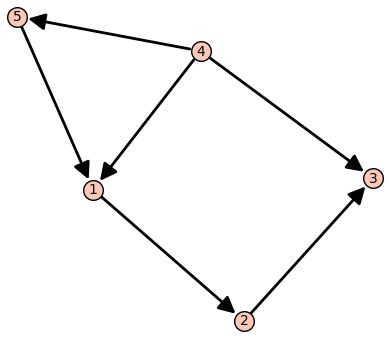

In [26]:
G = DiGraph({1:[2], 2:[3], 4:[1, 3, 5], 5:[1]})
show(G, figsize=[2,2])

Note: If we attempt to compute the weights of each page, we may encounter an error. This is due to the presence of Dangling nodes, where the random walk process can become stuck (if you think of the power iteration method as a random walk). In the example, when the walker is at state 3 (a Dangling node), there are no outgoing transitions,
leading to an inability to continue the walk and calculate weights accurately.

In [27]:
v = vector([1, 1, 1, 1, 1])
M = generate_Page_Rank_Matrix(G)
q = power_iteration(M, v)[1]
pretty_print(q)

/tmp/ipykernel_3208/2938673339.py:27: RuntimeWarning: invalid value encountered in multiply
  q = (A * q).normalized()


(NaN, NaN, NaN, NaN, NaN)

You can also think from the Markov matrix perspective. As mentioned in the course notes, we may encounter Markov matrices like $M_2$ as follows:

In [28]:
M2 = matrix(QQ,5,5,[0,0,1,0,0, 0,0,1/2,0,1/2, 0,1/2,1/2,0,0, 0,1/3,1/3,0,1/3, 0,0,0,0,1]).transpose()
pretty_print(M2)

[  0   0   0   0   0]
[  0   0 1/2 1/3   0]
[  1 1/2 1/2 1/3   0]
[  0   0   0   0   0]
[  0 1/2   0 1/3   1]

In [29]:
pretty_print(M2.eigenvectors_right()[0])

(1,
 [
 (0, 0, 0, 0, 1)
 ],
 1)

This is indicating that nodes 1, 2, 3, and 4 have no importance at all, which is not desirable.

### Loops

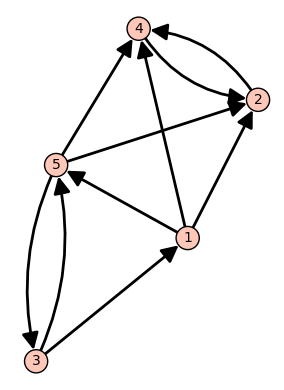

In [30]:
G = DiGraph({1:[2, 4, 5], 2:[4], 3:[1, 5], 4:[2], 5:[2, 3, 4]})
show(G, figsize=[2,2])

Please note that Pages 2 and 4 hold substantial significance due to their interconnected loop, denoted as $2 \iff 4$. When the random walker arrives at either Page 2 or Page 4, it becomes stuck in this loop, leading to both pages having equal probabilities of 0.5, which is not desireable.

In [31]:
v = vector([1, 1, 1, 1, 1])
M = generate_Page_Rank_Matrix(G)
q = power_iteration(M, v)[1]
q = q / sum(q)
pretty_print(q)

(0.0, 0.5, 0.0, 0.5, 0.0)

### Disconnected Graph

Now, let's consider $M_3$, defined as follows:

In [32]:
M3 = matrix(QQ,5,5,[1/2,0,1/2,0,0, 0,1,0,0,0, 1/3,1/3,1/3,0,0, 0,0,0,1/2,1/2, 0,0,0,1/2,1/2]).transpose()
pretty_print(M3)

[1/2   0 1/3   0   0]
[  0   1 1/3   0   0]
[1/2   0 1/3   0   0]
[  0   0   0 1/2 1/2]
[  0   0   0 1/2 1/2]

We observe that all nodes are split into two groups that do not communicate at all. As a result, the Markov matrix has two eigenvectors with respect to eigenvalue 1. Thus, we cannot compare their importance in a general sense.

In [33]:
pretty_print(M3.eigenvectors_right()[1])

(1,
 [
 (0, 1, 0, 0, 0),
 (0, 0, 0, 1, 1)
 ],
 2)

The graph associated with such matrices is the disconnected graphs. An example graph is shown in the next cell:

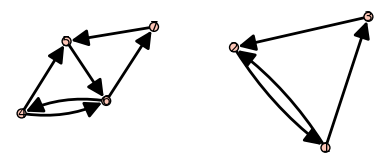

In [34]:
G = DiGraph({1:[2, 3], 2:[1], 3:[2], 4:[5, 6], 5:[6], 6:[4, 7], 7:[5]})
show(G, figsize=[2,2])

In [35]:
v = vector([1, 1, 1, 1, 1])
M = generate_Page_Rank_Matrix(G)
pretty_print(M.eigenvectors_right()[1])

(1,
 [
 (1, 1, 1/2, 0, 0, 0, 0),
 (0, 0, 0, 1, 3/2, 2, 1)
 ],
 2)

### Full model of PageRank

To solve above problem, we apply the idea of teleportation introduced by the co-funder of Google, Sergey Brin and Larry Page. 

Suppose you have a biased coin such that the probability of heads is $\alpha$, where $0 \leq \alpha \leq 1$. When we're on page $j$, we toss the coin. If page $j$ is a node with no outgoing links or if the coin lands tails, then I randomly select a page from the entire web and teleport to it; otherwise, I continue as usual, following a random link.

In mathematics, we replace the Markov matrix $M$ with the new matrix

$$\text{Google}(\alpha) = \alpha M+(1-\alpha)T.$$

This new matrix solves our problem as theorem 4.7.10 guarantees us that this matrix has only one eigenvector with respect to eigenvalue 1, and all entries of this eigenvector are positive. Here I state the theorem for your reference,

If $M \in Mat(n;R)$ is a Markov matrix all of whose entries are positive, then the eigenspace $E(1,M)$ is one dimensional. There exists a unique basis vector $\vec{v} \in E(1,M)$ all of whose entries are positive real numbers, $v_i > 0$ for all $i$, and such that the sum of its entries is $1$, $\sum_{i=1}^n v_i = 1$.


<div class="alert alert-info">
    <h3>Exercise 3.3</h3><span class="label label-primary">(non-assessed)</span>

(a). Write a function `random_google_markov_matrix_generator` which takes in `n` as the size of the matrix and `alpha` as the weight.
    
(b). Write a function `generate_google_matrix` that takes the directed graph `G`, and `alpha` as the weight.

In [36]:
def random_google_markov_matrix_generator(n, alpha):
    '''
    This function should return a random google Markiv matrix of size n and with weight alpha.
    '''
    
    # Generate a random Markov matrix
    M = markov_matrix_generator(n)
    
    # Define the teleportation matrix
    T = matrix(QQ,n,n,n**2*[1/n])
    
    # Apply the maths formula
    google_alpha = alpha*M + (1-alpha)*T
     
    return google_alpha

In [37]:
#Autograder test cell 

# Test case 1
M = random_google_markov_matrix_generator(4, 0.7)
assert [i > 0 for i in M]

column_sum = sum(M)
for i in column_sum:
    assert round(i,6) == 1
    
# Test case 2    
M = random_google_markov_matrix_generator(5, 17/20)
assert [i > 0 for i in M]

column_sum = sum(M)
for i in column_sum:
    assert round(i,6) == 1
    
print("Success! Your function generates random Google Markov matrices correctly.")

Success! Your function generates random Google Markov matrices correctly.


In [38]:
def generate_google_matrix(G, alpha):
    """
    Generates the Google matrix for a given graph G with a damping factor alpha.

    Parameters:
    G (Graph): The input graph.
    alpha (float): Damping factor for the Google matrix.

    Returns:
    The Google matrix.
    """
    # Teleportation matrix
    T = S = 1/n * matrix([[1]*n]*n)
    
    # Transition probability matrix
    M = generate_Page_Rank_Matrix(G) 
    
    # Google matrix with damping factor
    google_alpha = alpha * M + (1 - alpha) * T 

    return google_alpha

## 4. Apply to PageRank

As stated above, the internet can be represented as a graph, which in turn can be represented as a matrix. Google page rank algorithm converted this matrix to a markov matrix. The eigenvector of the markov matrix determines the ranking of the page.

Note that the Sage can generate random directed graphs by executing the cell below

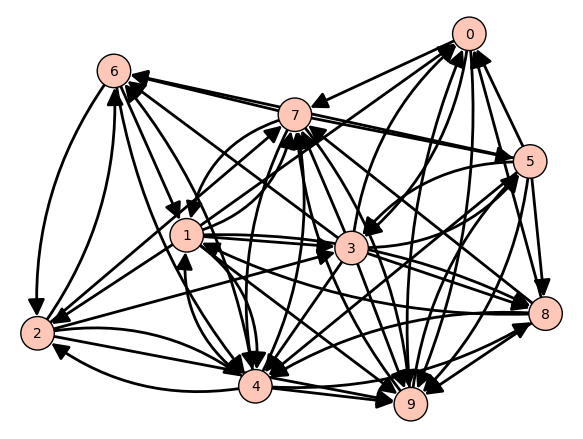

In [39]:
n = 10
N = 50
D = digraphs.RandomDirectedGNM(n, N)
D.show(figsize=6)

We then choose a random start state, and use that as our initial guess for the power iteration method.

In [40]:
starting_site = randint(0, n - 1)
v = vector([0]*n)
v[starting_site] = 1
print('The starting state is: ', starting_site)

The starting state is:  7


The cell below carries out the experiment of the Google PageRank algorithm, and display the rankings in a table. Note we use a fixed $\alpha=0.85$.

In [41]:
# Set the damping factor
alpha = 0.85

# Generate the PageRank matrix with damping factor
G = generate_google_matrix(D, alpha)

# Perform power iteration to compute eigenvalues and eigenvectors of G
l, q = power_iteration(G, v)

# Normalizing
q = q / sum(q)

# Sort the nodes based on their PageRank scores
sorted_nodes = []
for i in range(n):
    sorted_nodes.append([round(q[i], 2), i])
sorted_nodes.sort(reverse=True)

# Display the sorted nodes in a table
table(sorted_nodes, header_row=['Rank', 'Page no'])   

Rank,Page no
\(0.15\),\(7\)
\(0.14\),\(9\)
\(0.12\),\(4\)
\(0.1\),\(0\)
\(0.09\),\(6\)
\(0.09\),\(5\)
\(0.09\),\(1\)
\(0.08\),\(3\)
\(0.07\),\(8\)
\(0.07\),\(2\)


<div class="alert alert-info">
    <h3>Exercise 4.1</h3><span class="label label-primary">(non-assessed)</span>
    
Do the experiment with the random markov matrix, compute the ranking of the websites.


In [42]:
dim = 10
M = random_google_markov_matrix_generator(dim, 0.85)
q0 = vector(QQ, [1/1000 for i in range(dim)])
eigen_vec = power_iteration_tor(M, q0)

indexes = [i[0] for i in sorted(enumerate(list(eigen_vec[1])), key=lambda x:x[1])]
print("The ranking of the websites are:")
print(indexes)

The ranking of the websites are:
[3, 0, 4, 1, 8, 5, 9, 2, 7, 6]
